# COGS 108 Final Project

## Group Members 
- Hao-In Choi: A14726076 
- Lereanne Mendoza: A14696819 
- Victoria Vu: A13797934 
- Mayu Wilson: A13625483 

### Introduction & Background   

### Data Description 

### Import of Packages

In [1]:
# Importing all necessary packages

import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
from sklearn import linear_model

### Data Cleaning and Pre-Processing 

In [2]:
# Loading the YouTube data

df_youtube = pd.read_csv('data.csv') 

In [3]:
df_youtube

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724
6,7th,A++,netd müzik,8500.0,11373567.0,23898730764
7,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041
9,10th,A++,Zee Marathi,74607.0,2841811.0,2591830307


Our team noticed that the dataset contained empty values, specifically either under "Video Uploads" or “Subscribers”. Although we tried to look them up manually, the reason why these values were empty is because those corresponding channels may have hid them purposely or removed their affiliation with SocialBlade. With this, we decided to drop these rows. 

In [4]:
# Dropping all rows that contained empty values

df_youtube.dropna(inplace = True)

In [5]:
df_youtube

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724
6,7th,A++,netd müzik,8500.0,11373567.0,23898730764
7,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041
9,10th,A++,Zee Marathi,74607.0,2841811.0,2591830307


### Data Visualization 

Firstly, we will visualize the data via a scatter matrix. This is to see if there are any noticeable correlations between certain variables, such that we can apply certain correlation methods to the right variables. 

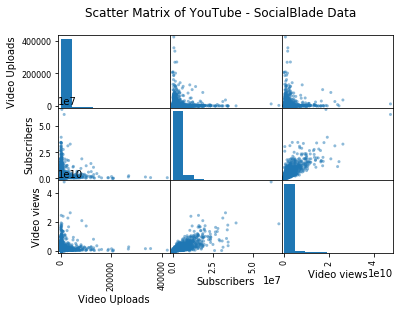

In [6]:
# Creating a scatter matrix in order to check for noticeable correlations 

youtube_matrix = scatter_matrix(df_youtube, alpha = 0.5)
plt.suptitle('Scatter Matrix of YouTube - SocialBlade Data')
plt.show()

### Data Analysis and Results 

### Privacy and Ethics Consideration 

### Conclusion and Discussion